In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc
import copy

In [17]:
class neuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.inodes = input_nodes
        self.hnodes = hidden_nodes
        self.onodes = output_nodes
        self.lr = learning_rate

        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        self.activation_function = lambda x: sc.expit(x)

    def train(self, inputs, targets):
        inputs = np.array(inputs, dtype=float, ndmin=2).T
        targets = np.array(targets, dtype=float, ndmin=2).T

        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        finall_inputs = np.dot(self.who, hidden_outputs)
        finall_outputs = self.activation_function(finall_inputs)

        #Training loss
        training_loss = np.mean((targets-finall_outputs)**2)

        output_errors = (targets - finall_outputs)
        hiidden_errors = np.dot(self.who.T, output_errors)

        self.who += self.lr * np.dot((output_errors * finall_outputs * (1.0 - finall_outputs)), np.transpose(hidden_outputs))
        self.wih += self.lr * np.dot((hiidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        return training_loss

    def query(self, inputs):
        inputs = np.array(inputs, dtype=float, ndmin=2).T
        
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        return final_outputs


In [18]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.1

network = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [19]:
training_data_file = open("data/mnist_train.csv")
test_data_file = open("data/mnist_test.csv")

training_data_list = training_data_file.readlines()
test_data_list = test_data_file.readlines()

training_data_file.close()
test_data_file.close()


In [20]:

def network_test(network_under_test, test_data_list):
    correct_answers = 0
    for record in test_data_list:
        all_values = record.split(',')
        inputs = (np.array(all_values[1:], dtype=float)/255*0.99)+0.01

        output = network_under_test.query(inputs)

        if np.argmax(output) == int(all_values[0]):
            correct_answers += 1

    return correct_answers, 10000 - correct_answers, correct_answers/100

correct_answers, mistakes, percent = network_test(network, test_data_list)

print(f"Correct: {correct_answers}\nMistakes: {mistakes}\nPercent: {percent}")

Correct: 693
Mistakes: 9307
Percent: 6.93


In [ ]:
epochs = 30
global_epoch_loss = []
percent_per_epoch = []


for _ in range(epochs):
    epoch_loss = []
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (np.array(all_values[1:], dtype=float)/255*0.99)+0.01
        targets = np.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] += 0.99

        training_loss = network.train(inputs, targets)
        epoch_loss.append(training_loss)
    
    global_epoch_loss.append(np.mean(epoch_loss))
    _, _, percent = network_test(network, test_data_list)
    percent_per_epoch.append(percent)

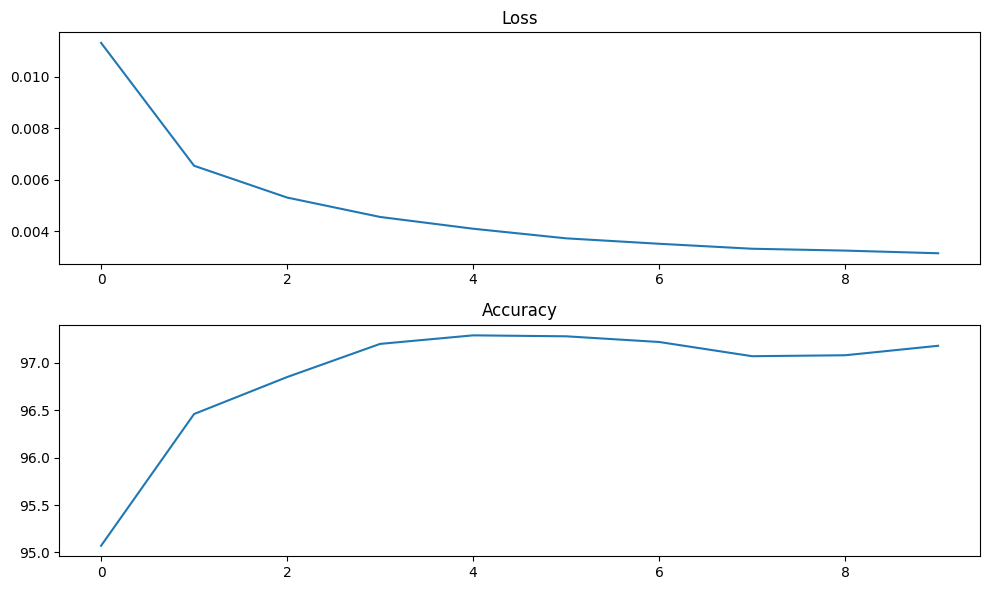

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(global_epoch_loss)
plt.title("Loss")

plt.subplot(2, 1, 2)
plt.plot(percent_per_epoch)
plt.title("Accuracy")

plt.tight_layout()
plt.show()